<a href="https://colab.research.google.com/github/SimonaBolehradsky/PPPO-projekat/blob/main/SimonaBolehradsky_IT35_2018_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Student: Simona Bolehradsky IT35/2018
## Tema: Generative Adversarial Networks



## **Uvod**
Tema ovog projekta je *Generative Adversarial Networks* (GAN).
GAN je uzbudljiva nedavna inovacija u mašinskom učenju. Ove mreže su pristup generativnom modeliranju koristeći metode dubokog učenja, kao što su konvolucione neuronske mreže. Generativno modeliranje je zadatak učenja bez nadzora u mašinskom učenju koji uključuje automatsko otkrivanje i učenje pravilnosti ili obrazaca u ulaznim podacima na takav način da se model može koristiti za generisanje ili izlaz novih primera koji su verovatno mogli biti izvučeni iz originalnog skupa podataka.


## **GAN**
GAN-ovi su pametan način obuke generativnog modela tako što se problem uokviruje kao problem učenja pod nadzorom sa dva podmodela: model generatora koji obučavamo da generiše nove primere i model diskriminatora koji pokušava da klasifikuje primere kao stvarne (iz domena) ili lažno (generisano). Opšti nazivi za ove modele su Generator  i Diskriminator  i smatraju se gradivnim blokovima koji stoje iza teorije GAN-ova. Dva modela se zajedno, sve dok model diskriminatora ne bude prevaren, što znači da model generatora generiše uverljive primere.
GAN-ovi su uzbudljivo polje koje se brzo menja, pružajući obećanje generativnih modela u svojoj sposobnosti da generišu realistične primere u nizu problematičnih domena, posebno u zadacima prevođenja slike u sliku kao što je prevođenje fotografija leta u zimu ili dan do noći, i u generisanju fotorealističnih fotografija objekata, scena i ljudi za koje čak ni ljudi ne mogu da prepoznaju da su lažni. Na primer, mogu da kreiraju slike koje izgledaju kao fotografije ljudskih lica, iako lica ne pripadaju nijednoj stvarnoj osobi. 
Generatorska mreža uzima kao ulaz jednostavan N-dimenzionalni vektor nasumičnog šuma i transformiše ga prema naučenoj ciljnoj distribuciji. Njegov izlaz je takođe N-dimenzionalan. Diskriminator sa druge strane modelira funkciju raspodele verovatnoće (poput klasifikatora) i daje verovatnoću da je ulazna slika stvarna ili lažna [0, 1]. Imajući ovo na umu, možemo definisati dva glavna cilja zadatka generisanja:
1. Obučiti generator da maksimizira diskriminatorovu konačnu grešku u klasifikaciji. (Tako da se generisane slike percipiraju kao stvarne).
2. Obučiti diskriminator da minimizira konačnu grešku u klasifikaciji. (Tako da se pravi podaci pravilno razlikuju od lažnih podataka).

### **Kako funkcionišu GAN-ovi**

Prvi korak u uspostavljanju GAN-a je identifikacija željenog krajnjeg rezultata i prikupljanje početnog skupa podataka na osnovu tih parametara. Ovi podaci se zatim randomiziraju i unose u generator dok ne steknu osnovnu tačnost u stvaranju rezultata.

Posle toga, generisane slike se unose u diskriminator zajedno sa stvarnim tačkama podataka iz originalnog koncepta. Diskriminator filtrira informacije i vraća verovatnoću između 0 i 1 da bi prikazao autentičnost svake slike (1 korelira sa stvarnom, a 0 korelira sa lažnom). Zatim se ove vrednosti ručno proveravaju za uspeh i ponavljaju dok se ne postigne željeni ishod.



In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p" -O all-dogs.zip && rm -rf /tmp/cookies.txt

--2022-07-14 16:21:51--  https://docs.google.com/uc?export=download&confirm=t&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p
Resolving docs.google.com (docs.google.com)... 142.251.2.113, 142.251.2.101, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p8r74t8vfqcm1hm6vj36p1m6ojb38jpf/1657815675000/06049624160957438625/*/1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p?e=download&uuid=31869dae-d931-48b7-944a-cbdc1dae09f4 [following]
--2022-07-14 16:21:52--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p8r74t8vfqcm1hm6vj36p1m6ojb38jpf/1657815675000/06049624160957438625/*/1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p?e=download&uuid=31869dae-d931-48b7-944a-cbdc1dae09f4
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 142.250.141.132, 260

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p" -O Annotation.zip && rm -rf /tmp/cookies.txt

--2022-07-14 08:54:03--  https://docs.google.com/uc?export=download&confirm=t&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p
Resolving docs.google.com (docs.google.com)... 108.177.119.139, 108.177.119.102, 108.177.119.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vf4p5dcdg33qvfu0ft6ch62gkg2qm02b/1657788825000/06049624160957438625/*/1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p?e=download&uuid=02824b56-c347-4f7e-8b92-e82c33268aa4 [following]
--2022-07-14 08:54:04--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vf4p5dcdg33qvfu0ft6ch62gkg2qm02b/1657788825000/06049624160957438625/*/1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p?e=download&uuid=02824b56-c347-4f7e-8b92-e82c33268aa4
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 108.177.127.

In [8]:
!unzip Annotation.zip

Streaming output truncated to the last 5000 lines.
  inflating: Annotation/n02088094-Afghan_hound/n02088094_5285  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_5285  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_4501  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_4501  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_13442  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_13442  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_8764  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_8764  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_3982  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_3982  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_3949  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_3949  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_1410  
  inflating: __MACOSX/Annotation/n02088094-Afghan

In [9]:
!unzip all-dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: all-dogs/n02113624_8890.jpg  
  inflating: all-dogs/n02107683_215.jpg  
  inflating: all-dogs/n02093428_5326.jpg  
  inflating: all-dogs/n02105412_8018.jpg  
  inflating: all-dogs/n02093647_3129.jpg  
  inflating: all-dogs/n02088466_8078.jpg  
  inflating: all-dogs/n02108915_4214.jpg  
  inflating: all-dogs/n02089078_2841.jpg  
  inflating: all-dogs/n02105855_3498.jpg  
  inflating: all-dogs/n02094114_2823.jpg  
  inflating: all-dogs/n02088094_649.jpg  
  inflating: all-dogs/n02091831_2232.jpg  
  inflating: all-dogs/n02096585_3105.jpg  
  inflating: all-dogs/n02109961_977.jpg  
  inflating: all-dogs/n02097047_5869.jpg  
  inflating: all-dogs/n02106030_16250.jpg  
  inflating: all-dogs/n02110958_13721.jpg  
  inflating: all-dogs/n02107142_8437.jpg  
  inflating: all-dogs/n02094433_1312.jpg  
  inflating: all-dogs/n02097474_5481.jpg  
  inflating: all-dogs/n02097130_1531.jpg  
  inflating: all-dogs/n02092339_284.jpg  
  inf

## **Uvozimo potrebe biblioteke za ovaj projekat.**

### Numpy
Numpy je Python biblioteka koja nudi višedimenzionalni objekat niza, razne izvedene objekte i asortiman rutina za brze operacije na nizovima, uključujući matematičke, logičke, manipulacije oblicima, sortiranje, odabir, I / O , diskretne Fourierove transformacije, osnovna linearna algebra, osnovne statističke operacije, slučajne simulacije i još mnogo toga.

### Os
OS modul u Pithonu pruža funkcije za interakciju sa operativnim sistemom. OS dolazi pod Pithonovim standardnim uslužnim modulima. Ovaj modul pruža prenosni način korišćenja funkcionalnosti zavisne od operativnog sistema. Moduli os i os.path uključuju mnoge funkcije za interakciju sa sistemom datoteka.

### cv2
OpenCV-Pithon je biblioteka Pithon veza koja je dizajnirana za rešavanje problema sa računarskim vidom. cv2.imread () metoda učitava sliku iz navedene datoteke. Ako se slika ne može pročitati (zbog nedostajuće datoteke, nepravilnih dozvola, nepodržanih ili nevaljanih formata), onda ovaj metod vraća praznu matricu.

### Keras
Keras je, biblioteka neuronskih mreža na visokom nivou koja radi na vrhu TensorFlov-a, CNTK-a i Theano-a. Korišćenje Kerasa u dubokom učenju omogućava lako i brzo izradu prototipova, kao i neometano pokretanje na CPU i GPU. Ovaj okvir je napisan u Pithon kodu koji je lak za otklanjanje grešaka i omogućava jednostavnost proširivosti.


In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, Reshape, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Conv2DTranspose

from tensorflow.keras.layers import BatchNormalization

Kako bi se svakoj fotografiji dodelio odgovarajući naziv rase na osnovu anotacija kreiramo rečnik koji mapira šifru rase u nazivu u stvarno ime rase. Anotacije se splituju po - karakteru kako bismo dobili naziv odgovarajuce rase koje smeštamo u recnik.

In [10]:
dog_breed_dict = {}
for annotation in os.listdir('Annotation'):
    annotations = annotation.split('-')
    dog_breed_dict[annotations[0]] = annotations[1]

# print(dog_breed_dict)

Fotografije transformišemo uRGB

In [11]:
def read_image(src='all-dogs'):
    img = cv2.imread(src)
    if img is None:
        print(src)
        raise FileNotFoundError
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

U Annotation folderu imamo xml fajlove za svaku fotografiju koji poseduju određene informacije kao na primer granične okvore oko svakog psa na slici. Koristimo xml biblioteku kako bismo kreirali stablo i pronašli odgovarajuće informacije. Za svaki objekat izdvajamo koordinate i obrezujemo fotografije na jednake veličine. Na kraju ih smeštamo u numpy niz.

In [ ]:
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt

dog_images_np = []
breeds = []

for annotationFolder in os.listdir('Annotation'):
  for xmlFile in os.listdir(os.path.join('Annotation', annotationFolder)):
    if (os.path.isfile(os.path.join('Annotation', annotationFolder, xmlFile)) is not True):
      continue
    tree = ET.parse(os.path.join('Annotation', annotationFolder, xmlFile))
    root = tree.getroot()
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)
    objects = root.findall('object')

    for o in objects:
      bndbox = o.find('bndbox')
      xmin = int(bndbox.find('xmin').text)
      ymin = int(bndbox.find('ymin').text)
      xmax = int(bndbox.find('xmax').text)
      ymax = int(bndbox.find('ymax').text)
      img = read_image(os.path.join('all-dogs', xmlFile + '.jpg'))
      img_cropped = img[ymin:ymin+ymax, xmin:xmin+xmax]                        
      img_cropped = cv2.resize(img_cropped, (64, 64), interpolation=cv2.INTER_AREA)
      dog_images_np.append(np.asarray(img_cropped))
      dog_breed_name = dog_breed_dict[xmlFile.split('_')[0]]
      breeds.append(dog_breed_name)

Kreiramo funkciju koja će nam prikazati fotografiju psa sa ispisanom rasom psa.

In [13]:
import math

def plot_features(features, labels, image_width=64, image_height=64, image_channels=5,
examples=25, disp_labels=True): 
  
    if not math.sqrt(examples).is_integer():
        print('Please select a valid number of examples.')
        return
    imgs = []
    classes = []
    for i in range(examples):
        rnd_idx = np.random.randint(0, len(labels))
        imgs.append(features[rnd_idx])
        classes.append(labels[rnd_idx])
    fig, axes = plt.subplots(round(math.sqrt(examples)), round(math.sqrt(examples)),figsize=(15,15),
    subplot_kw = {'xticks':[], 'yticks':[]},
    gridspec_kw = dict(hspace=0.3, wspace=0.03))
    
    for i, ax in enumerate(axes.flat):
        if disp_labels == True:
            ax.title.set_text(classes[i])
        ax.imshow(imgs[i])

Prikazujemo rezultat

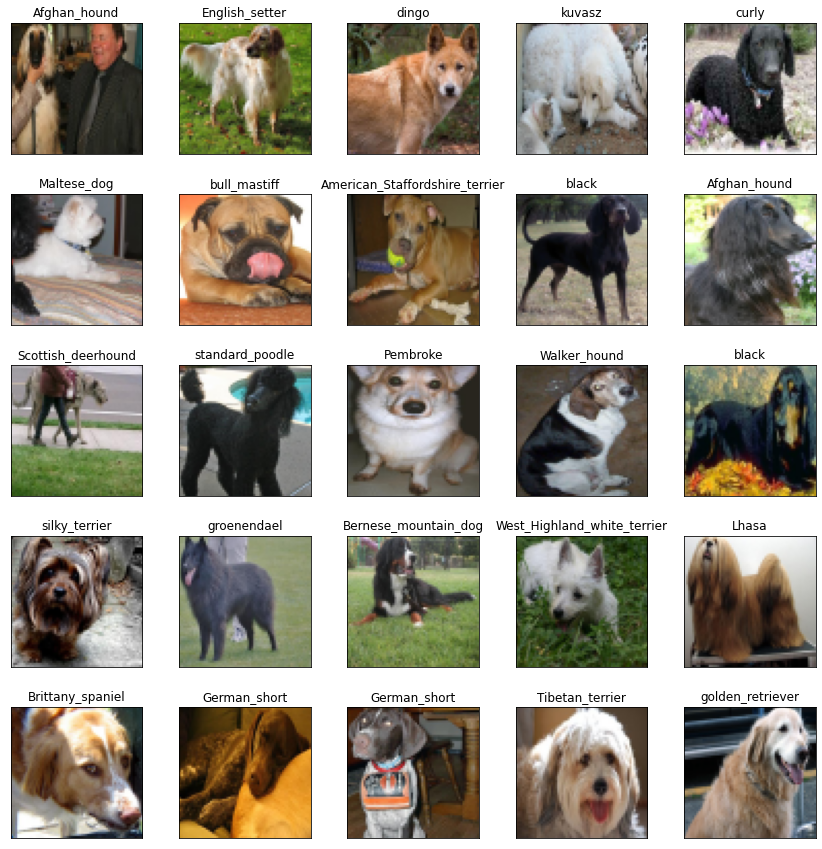

In [14]:
plot_features(dog_images_np, breeds, examples=25, disp_labels=True)

Kreiranje GAN klase, generatora i diskriminatora, i aktiviranje generatora. Zatim vršimo kreiranje funkcije za trening kojoj prosleđujemo odgovarajuće parametre, kao što su broj epoha, fotografija, broj serija koje definišu za koliko epoha se ispisuje rezultat gubitka generatora i diskriminatora.

Diskriminator optimizuje funkciju gubitka, koja se sastoji od zbira stvarnih i lažnih gubitaka, implementiranih od strane funkcija real_loss() i fake_loss().

Generator optimizuje stvarni gubitak da bi zavarao diskriminator čineći da generisana fotografija sve više liči na stvarne fotografije (počevši od random šuma).

In [18]:
class GAN():
    def __init__(self):
        self.img_shape = (64, 64, 3)
        
        self.noise_size = 100

        optimizer = Adam(0.0002,0.5)

        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', 
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        self.generator = self.build_generator()
        self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined = Sequential()
        self.combined.add(self.generator)
        self.combined.add(self.discriminator)
        
        self.discriminator.trainable = False
        
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined.summary()
        
    # Kreiranje generatora
    def build_generator(self):
        epsilon = 0.00001 
        noise_shape = (self.noise_size,)
        
        model = Sequential()
        
        model.add(Dense(4*4*512, activation='linear', input_shape=noise_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Reshape((4, 4, 512)))
        
        model.add(Conv2DTranspose(512, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(256, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(128, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(64, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(3, kernel_size=[4,4], strides=[1,1], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))

        
        model.add(Activation("tanh"))
        
        model.summary()

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)

   # Kreiranje diskriminatora
    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(128, (3,3), padding='same', input_shape=self.img_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.2))

        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        
        model.summary()
        
        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

        
   # Funkcija za trening
    def train(self, epochs, batch_size=128, metrics_update=50, save_images=100, save_model=2000):

        X_train = np.array(dog_images_np)
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5

        half_batch = int(batch_size / 2)
        
        mean_d_loss=[0,0]
        mean_g_loss=0

        for epoch in range(epochs):
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (half_batch, self.noise_size))
            gen_imgs = self.generator.predict(noise)

            # Trening diskriminatora
            d_loss = 0.5 * np.add(self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1))),
                                  self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1))))

             # Trening generatora
            noise = np.random.normal(0, 1, (batch_size, self.noise_size))

            valid_y = np.array([1] * batch_size)
            g_loss = self.combined.train_on_batch(noise, valid_y)
            
            mean_d_loss[0] += d_loss[0]
            mean_d_loss[1] += d_loss[1]
            mean_g_loss += g_loss

           
            if epoch % metrics_update == 0:
                print ("%d [Discriminator loss: %f, acc.: %.2f%%] [Generator loss: %f]" % (epoch, mean_d_loss[0]/metrics_update, 100*mean_d_loss[1]/metrics_update, mean_g_loss/metrics_update))
                mean_d_loss=[0,0]
                mean_g_loss=0
            
            # Čuvanje 25 fotografija
            if epoch % save_images == 0:
                self.save_images(epoch)
            
            # Čuvamo arhitekturu modela, težine i stanje optimizatora
            if epoch % save_model == 0:
                self.generator.save("generator_%d" % epoch)
                self.discriminator.save("discriminator_%d" % epoch)

    def save_images(self, epoch):
        noise = np.random.normal(0, 1, (25, self.noise_size))
        gen_imgs = self.generator.predict(noise)
        
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5,5, figsize = (8,8))

        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[5*i+j])
                axs[i,j].axis('off')

        plt.show()
        
        fig.savefig("dogGenerated/Faces_%d.png" % epoch)
        plt.close()

In [19]:
!mkdir dogGenerated

mkdir: cannot create directory ‘dogGenerated’: File exists


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 64, 64, 128)       0         
                                                                 
 batch_normalization_8 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 64, 64, 128)       0         
                                                                 
 batch_normalization_9 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                      

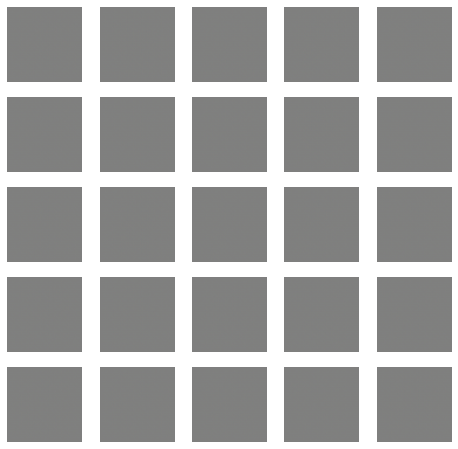

INFO:tensorflow:Assets written to: generator_0/assets
INFO:tensorflow:Assets written to: discriminator_0/assets
20 [Discriminator loss: 0.250734, acc.: 90.14%] [Generator loss: 0.486110]


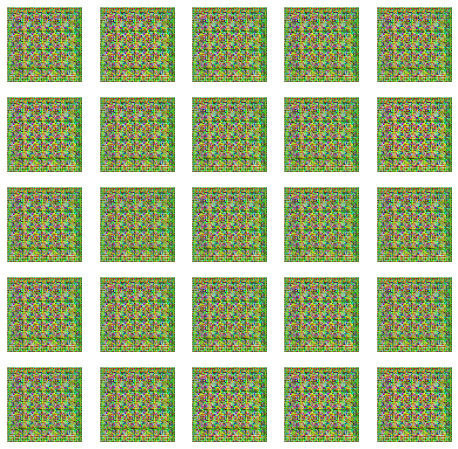

40 [Discriminator loss: 0.016881, acc.: 99.86%] [Generator loss: 0.170127]
60 [Discriminator loss: 0.003958, acc.: 100.00%] [Generator loss: 0.036932]


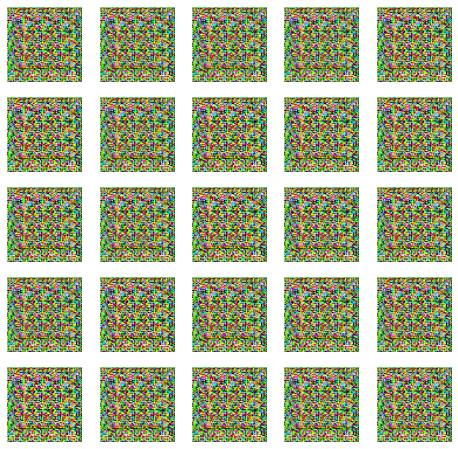

80 [Discriminator loss: 0.001362, acc.: 100.00%] [Generator loss: 0.006038]


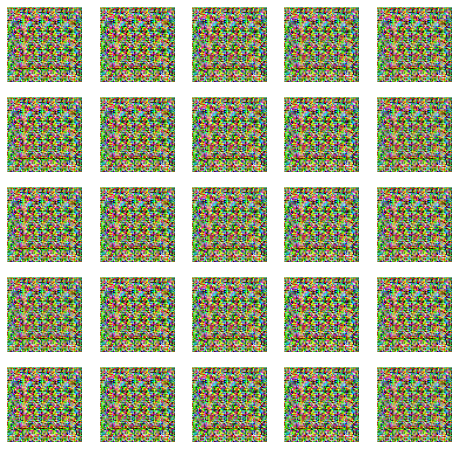

100 [Discriminator loss: 0.000684, acc.: 100.00%] [Generator loss: 0.001081]
120 [Discriminator loss: 0.000441, acc.: 100.00%] [Generator loss: 0.000274]


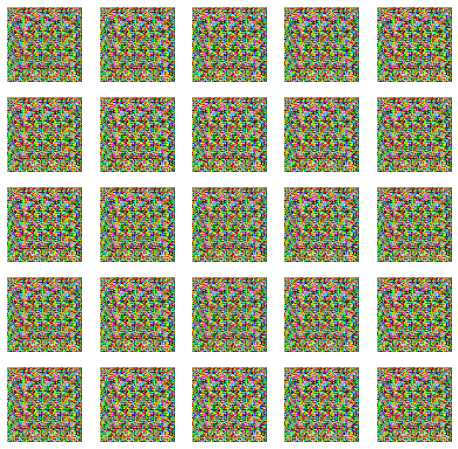

140 [Discriminator loss: 0.000269, acc.: 100.00%] [Generator loss: 0.000105]


In [20]:
gan=GAN()
gan.train(epochs=150, batch_size=256, metrics_update=20, save_images=30, save_model=150)

## **Zaključak**

Postoji mnogo razloga zašto je obuka generativnih kontradiktornih mreža teška ali neki od glavih razloga su :

1.Nestabilnost- obuka diskriminatora je nestabilna jer postavlja dve neuronske mreže jednu protiv druge sa ciljem da obe mreže dostignu ravnotežu. Ovo je snažna pretpostavka posebno zato što ne postoji garancija da će ažuriranja gradijenta dovesti do konvergencije. Poznato je da kontradiktorni ciljevi mogu dovesti do nasumičnih oscilacija.

2.Slom režima- ovo se desi kada generator nauči da proizvodi uzorke koji odgovaraju samo delu stvarne distribucije tokom obuke. 

3.Slab gradijent- obuka postaje veoma teška kada su stvarna i lažna distribucija veoma udaljene jedna od druge. Sa orginalnim ciljem GAN obuka postaje gotovo nemoguća jer je generator prima vrlo slab gradijent signal od diskriminatora. 

Postoje GAN varijante koje nisu DCGANS kao što je BigGAN. Poslednjih godina, BigGAN-ovi su znatno nadmašili DCGAN-ove. Korišćenje takvih modela moglo bi značajno poboljšati performanse. Google Colab je omogućio smanjenje vremena obuke, što je omogućilo bržu iteraciju za podešavanje modela. Korišćenje strukturisanog skupa podataka  u kome su slike pasa isečene i bez pozadine koja ometa – moglo bi da dovede do boljih performansi generatora, jer bi raspodela karakteristika svake slike bila otprilike ista. Na osnovu dosadašnjeg stečenog znanja i iskustva ovaj rad je zaprimio ovakav sadržaj i formu.


### **Literatura**

1. Literatura sa vežbi

2. https://developers.google.com/machine-learning/gan

3. https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/

4. https://arxiv.org/pdf/1406.2661.pdf


 

